# Neyman-Pearson detectors for Gaussians

Here, we'll take a look graphically at detectors for different multivariate distributions. We'll use 2D Gaussians for better visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Different mean, same covariance

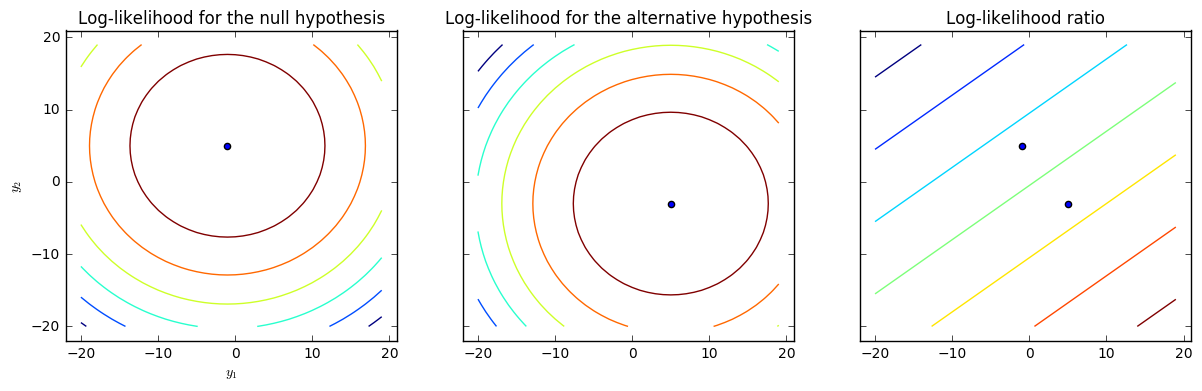

In [46]:
mu_0 = np.array([-1, 5])
mu_1 = np.array([5, -3])
sigma_2 = 1

#Contour plot for the LLF for the null hypothesis
v_min = -20
v_max = 20
delta = 1
v1 = np.arange(v_min,v_max,delta)
v2 = np.arange(v_min,v_max,delta)
length = v2.size

X1, X2 = np.meshgrid(v1, v2)
x1 = np.array(X1).flatten()
x2 = np.array(X2).flatten()

X = np.stack((x1,x2)) - np.tile(mu_0,[length**2,1]).T
L0 = np.diag(-1/(2*sigma_2)*(X.T@X)).reshape(length,length)

#Repeat for the alternative hypothesis
X = np.stack((x1,x2)) - np.tile(mu_1,[length**2,1]).T
L1 = np.diag(-1/(2*sigma_2)*(X.T@X)).reshape(length,length)

fig, axs = plt.subplots(ncols=3, sharey=True)

axs[0].contour(X1,X2,L0)
axs[0].scatter(mu_0[0],mu_0[1])
axs[0].set_xlabel('$y_1$')
axs[0].set_ylabel('$y_2$')
axs[0].set_title('Log-likelihood for the null hypothesis')

axs[1].contour(X1,X2,L1)
axs[1].scatter(mu_1[0],mu_1[1])
axs[1].set_title('Log-likelihood for the alternative hypothesis')

axs[2].contour(X1,X2,L1-L0)
axs[2].scatter([mu_0[0],mu_1[0]],[mu_0[1],mu_1[1]])
axs[2].set_title('Log-likelihood ratio')

fig.subplots_adjust(right=2)
plt.show()

## Same mean, different covariance

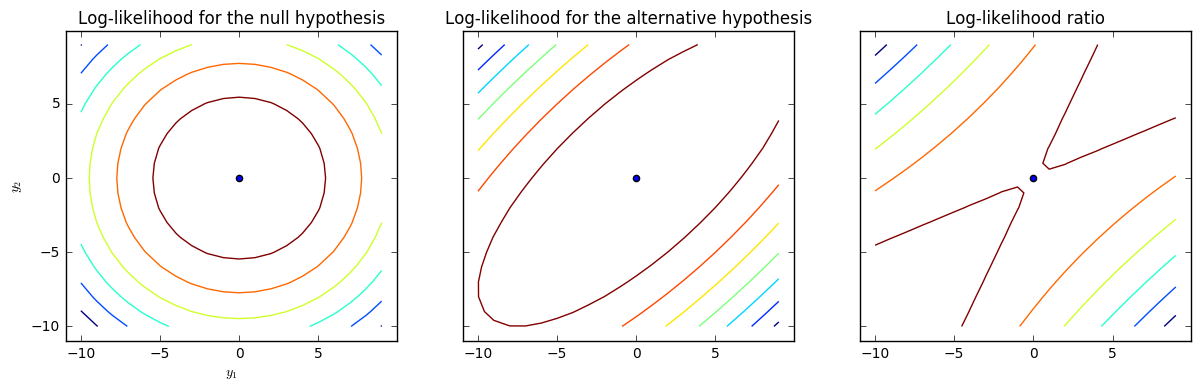

In [49]:
Sigma_0 = np.array([[1,0],[0,1]])
Sigma_1 = np.array([[1, 0.75],[0.75, 1]])

#Contour plot for the LLF for the null hypothesis
v_min = -10
v_max = 10
delta = 1
v1 = np.arange(v_min,v_max,delta)
v2 = np.arange(v_min,v_max,delta)
length = v2.size

X1, X2 = np.meshgrid(v1, v2)

x1 = np.array(X1).flatten()
x2 = np.array(X2).flatten()

X = np.stack((x1,x2))
L0 = np.diag(-1/2*(X.T@np.linalg.inv(Sigma_0)@X)).reshape(length,length)

#Repeat for the alternative hypothesis
X = np.stack((x1,x2))
L1 = np.diag(-1/2*(X.T@np.linalg.inv(Sigma_1)@X)).reshape(length,length)

fig, axs = plt.subplots(ncols=3, sharey=True)

axs[0].contour(X1,X2,L0)
axs[0].scatter(0,0)
axs[0].set_xlabel('$y_1$')
axs[0].set_ylabel('$y_2$')
axs[0].set_title('Log-likelihood for the null hypothesis')

axs[1].contour(X1,X2,L1)
axs[1].scatter(0,0)
axs[1].set_title('Log-likelihood for the alternative hypothesis')

axs[2].contour(X1,X2,L1-L0)
axs[2].scatter(0,0)
axs[2].set_title('Log-likelihood ratio')

fig.subplots_adjust(right=2)
plt.show()

Let's try out the detector in the case of identical covariances, building up the ROC curve by trying out multiple of values of the threshold. You can change the value of sigma_2 to get a different ROC curve.

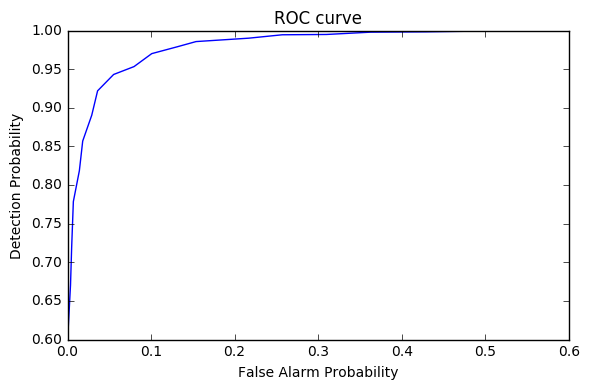

In [42]:
NUM_SAMPLES = 5000
sigma_2 = 10
thresholds = np.arange(-50,50,5)

w = mu_1 - mu_0
p_fa = np.zeros(thresholds.size)
p_d = np.zeros(thresholds.size)
for j in range(0,thresholds.size):
    threshold =  thresholds[j]

    for k in range(0,NUM_SAMPLES):
        y = mu_0 + np.sqrt(sigma_2)*np.random.randn(2)
        if(w.T@y > threshold):
            p_fa[j] += 1/NUM_SAMPLES

    for k in range(0,NUM_SAMPLES):
        y = mu_1 + np.sqrt(sigma_2)*np.random.randn(2)
        if(w.T@y > threshold):
            p_d[j] += 1/NUM_SAMPLES

plt.plot(p_fa,p_d)

plt.xlabel("False Alarm Probability")
plt.ylabel("Detection Probability")
plt.title("ROC curve")

plt.tight_layout()
plt.show()